In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

In [15]:
# create a four item DataFrame
s = Series([1,2,3,4])

In [17]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
dates = pd.date_range('2014-07-01', '2014-07-06')
temperature = Series([80,82,85,90,83,87], index = dates)

In [5]:
!type results_0_0.csv #!cat data/test1.csv # on non-windows systems

The syntax of the command is incorrect.


In [6]:
df = pd.read_csv('results_0_0.csv',sep=None, delimiter='\t', index_col=0)
df

       End Time Wind Speed Vestas 126 3.3MW Power Output  \
Date                                                       
NaN         NaN        m/s                            kW   
Jan 1      1:00      6.014                      7642.170   
Jan 1      2:00      5.208                      4923.124   
Jan 1      3:00      4.735                      3658.328   
Jan 1      4:00      1.592                         0.000   
...         ...        ...                           ...   
Dec 31    20:00      7.656                     15556.104   
Dec 31    21:00     12.259                     43560.492   
Dec 31    22:00     12.761                     44021.406   
Dec 31    23:00      7.254                     13618.483   
Jan 1      0:00      6.042                      7777.205   

       Vestas 126 3.3MW Operating Status GAMESA 114 2.5MW Power Output  \
Date                                                                     
NaN                               status                            kW 

In [29]:
def read_csv(content):
    columns = next(content).strip().split('\t')
    units = next(content).strip().split('\t')
    units.insert(0,'')
    units.insert(0,'')
    obs = pd.read_table(content, sep=None, delimiter='\t', header=None)
    obs.columns = ['{c} ({u})'.format(c=col, u=unit)
                   for col, unit in zip(columns, units)]
    obs["Time"] = obs["Date ()"].map(str) + ' ' + obs["End Time ()"]
    obs["Time"] = pd.to_datetime(pd.Series(obs["Time"]))
    obs = obs.drop("Date ()", 1)
    obs = obs.drop("End Time ()",1)
    obs = obs.reindex_axis(['Time'] + list(obs.columns[:-1]), axis=1)
    return obs

content = open('results_0_0.csv', 'r') 
obs = read_csv(content)
print(obs)

In [19]:
obs

                    Time  Wind Speed (m/s)  \
0    2015-01-01 01:00:00             6.014   
1    2015-01-01 02:00:00             5.208   
2    2015-01-01 03:00:00             4.735   
3    2015-01-01 04:00:00             1.592   
4    2015-01-01 05:00:00             2.212   
...                  ...               ...   
8755 2015-12-31 20:00:00             7.656   
8756 2015-12-31 21:00:00            12.259   
8757 2015-12-31 22:00:00            12.761   
8758 2015-12-31 23:00:00             7.254   
8759 2015-01-01 00:00:00             6.042   

      Vestas 126 3.3MW Power Output (kW)  \
0                               7642.170   
1                               4923.124   
2                               3658.328   
3                                  0.000   
4                                  0.000   
...                                  ...   
8755                           15556.104   
8756                           43560.492   
8757                           44021.406   
8758   

In [21]:
# import stock ticker information from Yahoo
from pandas.io.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

goog = DataReader("GOOG", "yahoo", date.today() + relativedelta(months=-3))
goog.tail()

                  Open        High         Low       Close   Volume  \
Date                                                                  
2015-06-08  533.309998  534.119995  526.239990  526.830017  1520600   
2015-06-09  527.559998  529.200012  523.010010  526.690002  1441600   
2015-06-10  529.359985  538.359985  529.349976  536.690002  1811400   
2015-06-11  538.424988  538.979980  533.020020  534.609985  1205000   
2015-06-12  531.599976  533.119995  530.159973  532.330017   952400   

             Adj Close  
Date                    
2015-06-08  526.830017  
2015-06-09  526.690002  
2015-06-10  536.690002  
2015-06-11  534.609985  
2015-06-12  532.330017  

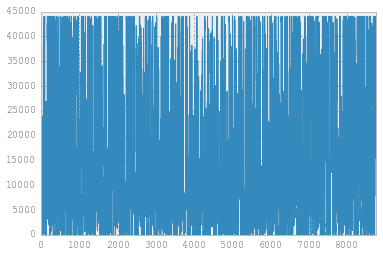

In [23]:
obs['Vestas 126 3.3MW Power Output (kW)'].plot()

In [2]:
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from itertools import chain

ImportError: No module named 'mpl_toolkits.basemap'